# Filtro Notch

---

O objetivo deste notebook é projetar e implementar um filtro do tipo rejeita-faixa (notch) a fim de remover um ruído contido em um arquivo de áudio utilizando **exclusivamente** o conceito da Função de Transferência em Z.

O script abaixo carrega, do arquivo **teste3.wav**, um sinal contendo um áudio conhecido, aqui contaminado com um ruído (apito agudo) constante durante toda a duração do áudio.

Esse apito agudo trata-se de um ruído de alta frequência (com espectro estreito, praticamente um impulso) facilmente identificável na observação do seu espectro.

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import scipy.io.wavfile as wav

# Diagrama de polos e zeros
import matplotlib.pyplot as plt
from  matplotlib import patches
from matplotlib.figure import Figure
from matplotlib import rcParams
    
def zplane(b,a,filename=None):
    """Plot the complex z-plane given a transfer function.
    """

    # get a figure/plot
    ax = plt.subplot(111)

    # create the unit circle
    uc = patches.Circle((0,0), radius=1, fill=False,
                        color='black', ls='dashed')
    ax.add_patch(uc)

    # The coefficients are less than 1, normalize the coeficients
    if np.max(b) > 1:
        kn = np.max(b)
        b = b/float(kn)
    else:
        kn = 1

    if np.max(a) > 1:
        kd = np.max(a)
        a = a/float(kd)
    else:
        kd = 1
        
    # Get the poles and zeros
    p = np.roots(a)
    z = np.roots(b)
    k = kn/float(kd)
    
    # Plot the zeros and set marker properties    
    t1 = plt.plot(z.real, z.imag, 'go', ms=10)
    plt.setp( t1, markersize=10.0, markeredgewidth=1.0,
              markeredgecolor='k', markerfacecolor='g')

    # Plot the poles and set marker properties
    t2 = plt.plot(p.real, p.imag, 'rx', ms=10)
    plt.setp( t2, markersize=12.0, markeredgewidth=3.0,
              markeredgecolor='r', markerfacecolor='r')

    ax.spines['left'].set_position('center')
    ax.spines['bottom'].set_position('center')
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)

    # set the ticks
    r = 1.5; plt.axis('scaled'); plt.axis([-r, r, -r, r])
    ticks = [-1, -.5, .5, 1]; plt.xticks(ticks); plt.yticks(ticks)

    if filename is None:
        plt.show()
    else:
        plt.savefig(filename)
    

    return z, p, k

22050


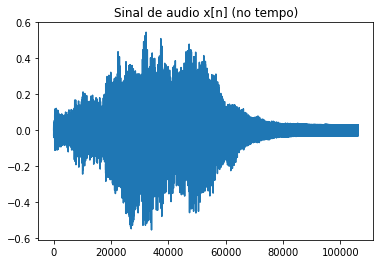

106150


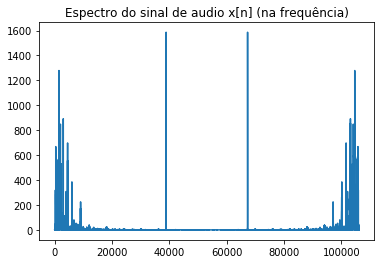

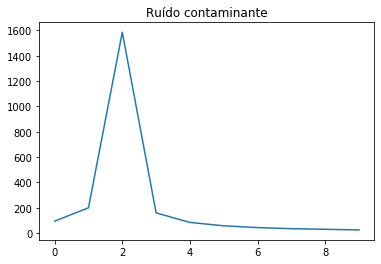

Ruído contaminante: 38872
8074,683


In [2]:
# abre um arquivo de audio e armazena os valores em x
[fs,x] = wav.read('teste3.wav')

print(fs)

# normaliza o vetor de entrada para manter no intervalo [-1 1]
x = np.array(x)
x = x / 32768.0

# mostra o sinal de audio no tempo
plt.title('Sinal de audio x[n] (no tempo)')
plt.plot(x)
plt.show()

# calcula a FFT de x[n]
X = np.fft.fft(x)
print(len(x))

# mostra a magnitude da FFT (abs(X)) de x[n]
plt.title('Espectro do sinal de audio x[n] (na frequência)')
plt.plot(abs(X))
plt.show()

plt.title('Ruído contaminante')
plt.plot(abs(X[38870:38880]))
plt.show()
print('Ruído contaminante: 38872')
print('8074,683')

# To do

1) Usando o gráfico do espectro em frequências do sinal $x[n]$, identifique a frequência do ruído contaminante e, com auxílio do software FT3D, projete um filtro notch capaz de removê-lo sem prejudicar as características originais do sinal de entrada.









$$H(z)=\frac{1 + 1,33 \cdot z^{-1} + \cdot z^{-2}}{1 + 1,2 \cdot z^{-1} + 0,81 \cdot z^{-2}}$$

# To do

2) Plote a resposta ao impulso $h[n]$ do filtro projetado.

C:\Users\Felipe Freitas\anaconda3\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: divide by zero encountered in double_scalars
  if __name__ == '__main__':


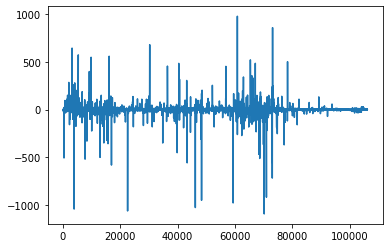

In [3]:
n=0
y = np.zeros(len(x))
h = np.zeros(len(x))
for n in range (2,len(x)):  
  y[n]=x[n]+1.33*x[n-1]+x[n-2]-1.2*y[n-1]-0.81*y[n-2]


for n in range (2,len(x)):  
  h[n]=y[n]/x[n]


plt.plot(h)
plt.show() 


# To do

3) Plote a resposta em frequência $H(e^{j \omega})$ do filtro projetado.

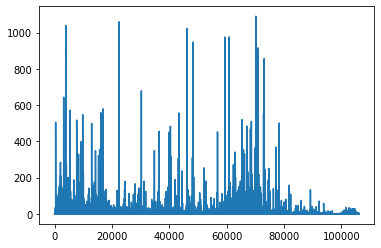

In [4]:
Y = np.fft.fft(h)
plt.plot(abs(h))
plt.show()

# To do

4) Plote o diagrama de polos e zeros $H(z)$ do filtro projetado.

**obs:** para plotar o plano z (com pólos e zeros) sugere-se o uso da implementação da função **zplane()** disponibilizada em: https://www.dsprelated.com/showcode/244.php 

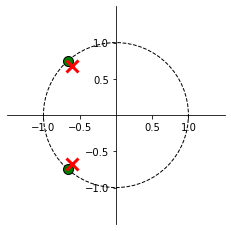

(array([-0.665+0.74684336j, -0.665-0.74684336j]),
 array([-0.6+0.67082039j, -0.6-0.67082039j]),
 1.1083333333333334)

In [5]:
# Diagrama de polos e zeros

b = np.array([1, 1.33, 1])
a = np.array([1, 1.2, 0.81])
zplane(b,a)

# To do

5) Plote o gráfico do espectro em frequências do sinal de saída $y[n]$ a fim de evidenciar, visualmente, que o ruído contaminante foi eficientemente removido.

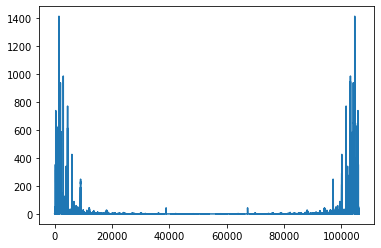

In [6]:
Y = np.fft.fft(y)
plt.plot(abs(Y))
plt.show()

# To do

6) Salve o arquivo de saída $y[n]$ em um arquivo do tipo wave com o nome **teste3-saida.wav** a fim de comprovar, auditivamente, que o ruído contaminante foi eficientemente removido.

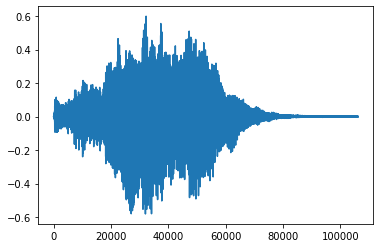

In [7]:
plt.plot(y)
plt.show()

# Dados do aluno

**Nome**:

**Matrícula**: